In [20]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [4]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/HeartDisease.csv"
df = pd.read_csv(url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [10]:
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ["Column", "Missing Values"]
print(tabulate(missing_values, headers='keys', tablefmt='grid'))

+----+----------+------------------+
|    | Column   |   Missing Values |
+====+==========+==================+
|  0 | age      |                0 |
+----+----------+------------------+
|  1 | sex      |                0 |
+----+----------+------------------+
|  2 | cp       |                0 |
+----+----------+------------------+
|  3 | trestbps |                0 |
+----+----------+------------------+
|  4 | chol     |                0 |
+----+----------+------------------+
|  5 | fbs      |                0 |
+----+----------+------------------+
|  6 | restecg  |                0 |
+----+----------+------------------+
|  7 | thalach  |                0 |
+----+----------+------------------+
|  8 | exang    |                0 |
+----+----------+------------------+
|  9 | oldpeak  |                0 |
+----+----------+------------------+
| 10 | slope    |                0 |
+----+----------+------------------+
| 11 | ca       |                0 |
+----+----------+------------------+
|

In [42]:
df = df.dropna()  # hapus missing value

In [43]:
# Prediction & Evaluation
X, y = df.drop(columns=['num']), df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

model = LogisticRegression(max_iter=200).fit(X_train, y_train)
y_pred, y_prob = model.predict(X_test), model.predict_proba(X_test)

In [44]:
# Evaluasi
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

print(f"Akurasi     : {acc:.2f}")
print(f"Presisi     : {prec:.2f}")
print(f"Recall      : {rec:.2f}")
print(f"F1-Score    : {f1:.2f}")
print(f"AUC Score   : {auc:.2f}")

Akurasi     : 0.62
Presisi     : 0.32
Recall      : 0.28
F1-Score    : 0.29
AUC Score   : 0.76


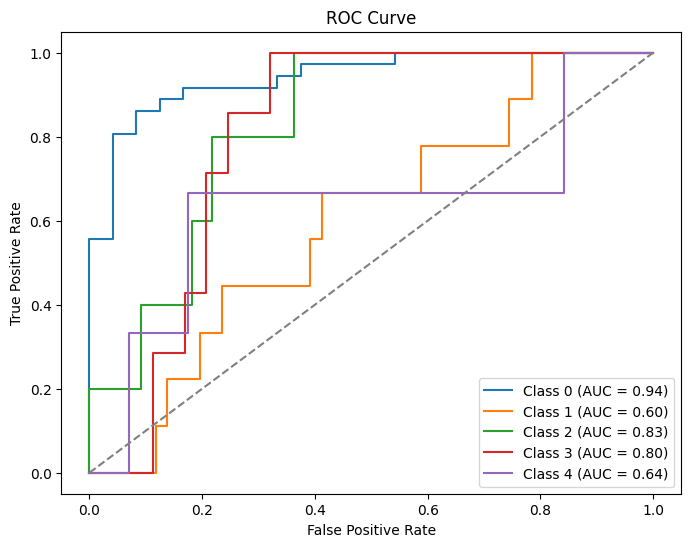

In [45]:
# Plot ROC Curve
plt.figure(figsize=(8,6))
for i in range(y_prob.shape[1]):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
    auc = roc_auc_score((y_test == i).astype(int), y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Rumus Matematika yang digunakan:

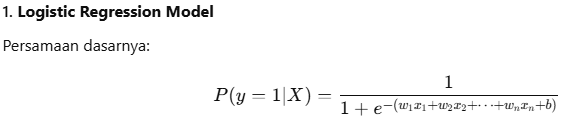

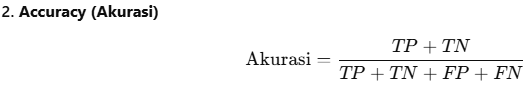

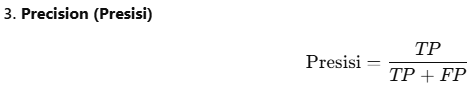

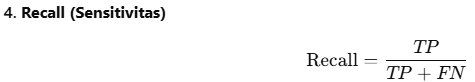

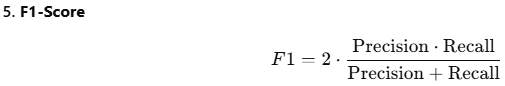

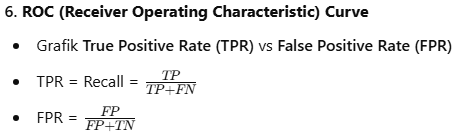

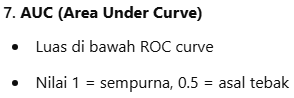